In [1]:
#import os
#os.environ['OPENAI_API_KEY'] = 'sk-...'

In [2]:
from bia_bob import bob
bob.__version__

'0.9.0'

In [3]:
%bob load blobs.tif and show it

I will load the image file "blobs.tif" and display it.



StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
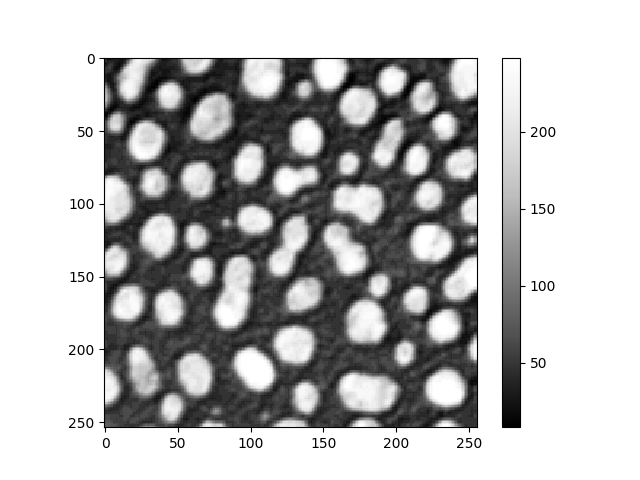
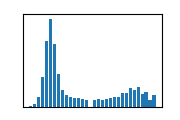

In [4]:
from skimage.io import imread
import stackview

# Load the image
filename = 'blobs.tif'
image = imread(filename)

# Display the image
stackview.insight(image)

In [5]:
%%bob 
Segment the image stored in the variable `image` using 
thresholding and connected component labeling. 
Show the resulting label image.

I am going to segment the provided image using Otsu's method for thresholding and then label the connected components.



StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
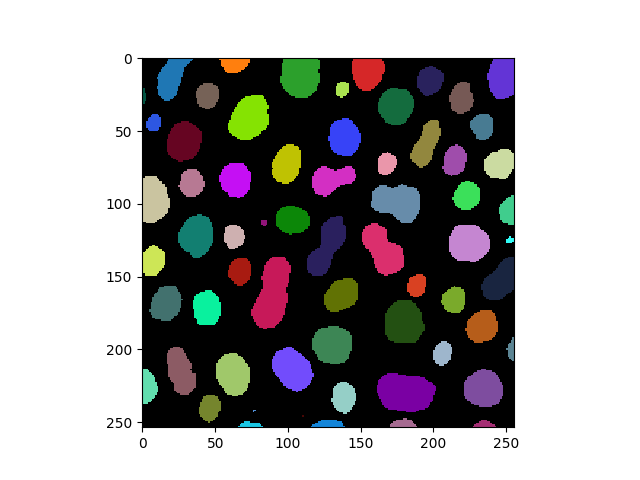

In [6]:
from skimage.filters import threshold_otsu
from skimage.measure import label
import stackview

# Apply Otsu's thresholding
thresh = threshold_otsu(image)
binary = image > thresh

# Label connected components
label_image = label(binary)

# Display the label image
stackview.insight(label_image)

In [7]:
%%bob
Measure size and shape of the segmented objects using `regionprops_table` and 
store the results in a pandas dataframe. 
Show this dataframe.

I will measure the size and shape properties of the segmented objects using `regionprops_table` and store the results in a pandas DataFrame. I will then display this DataFrame.



In [8]:
from skimage.measure import regionprops_table
import pandas as pd

# Measure properties of labeled regions
properties = regionprops_table(label_image, image, 
                               properties=('label',
                                           'area', 
                                           'perimeter', 
                                           'major_axis_length',
                                           'minor_axis_length',
                                           'eccentricity',
                                           'orientation'))

# Create a pandas DataFrame
df = pd.DataFrame(properties)

# Display the DataFrame
df

,label,area,perimeter,major_axis_length,minor_axis_length,eccentricity,orientation
0,1,433,91.254834,34.957399,16.819060,0.876649,-0.445057
1,2,185,53.556349,21.061417,11.803854,0.828189,-1.518883
2,3,658,95.698485,30.212552,28.278264,0.352060,-0.151090
3,4,434,76.870058,24.535398,23.064079,0.341084,-0.513943
4,5,477,83.798990,31.162612,19.833058,0.771328,-0.045020
...,...,...,...,...,...,...,...
59,60,1,0.000000,0.000000,0.000000,0.000000,0.785398
60,61,81,40.727922,18.558405,5.920690,0.947745,-1.565594
61,62,90,46.278175,22.458271,5.369081,0.971003,-1.547086
62,63,53,31.899495,14.811463,5.065719,0.939695,1.565945


In [9]:
%%bob
plot the perimeter against eccentricity using the seaborn library

I will create a scatter plot with perimeter on the x-axis and eccentricity on the y-axis using the seaborn library.



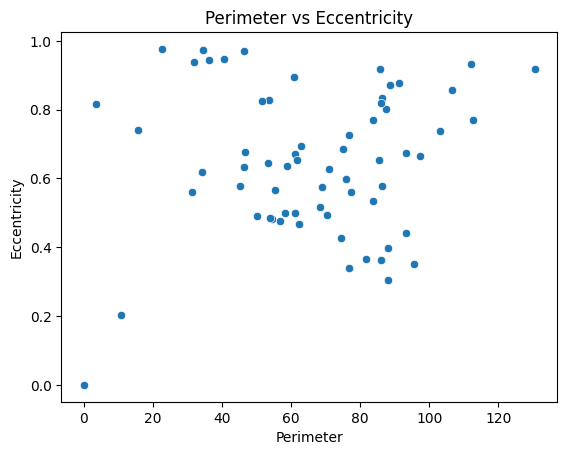

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of perimeter versus eccentricity
sns.scatterplot(x='perimeter', y='eccentricity', data=df)

# Show the plot
plt.xlabel('Perimeter')
plt.ylabel('Eccentricity')
plt.title('Perimeter vs Eccentricity')
plt.show()